In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("/content/Network_Intrusion.csv")
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [ ]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
data["class"].value_counts(normalize=True)

normal     0.53386
anomaly    0.46614
Name: class, dtype: float64

data["class"].value_counts(normalize=True) returns the proportions of each unique value in the "class" column, which can be useful for understanding the distribution of classes or categories in the dataset.

<Axes: >

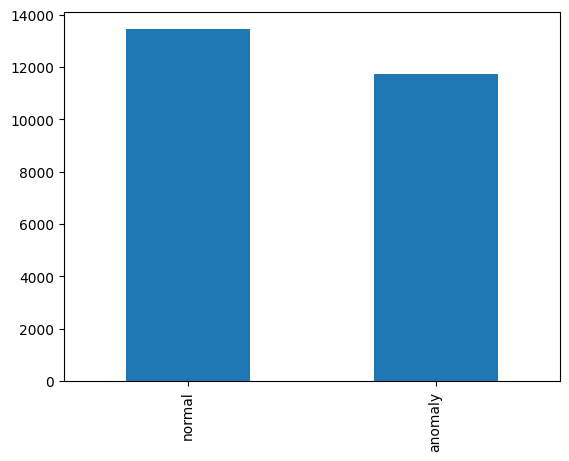

In [ ]:
pd.value_counts(data["class"]).plot(kind="bar")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['class']=le.fit_transform(data["class"])
data['protocol_type']=le.fit_transform(data["protocol_type"])
data['service']=le.fit_transform(data["service"])
data['flag']=le.fit_transform(data["flag"])

In [ ]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
x_std=pd.DataFrame(StandardScaler().fit_transform(data))
x_std=data.columns

In [24]:
from sklearn.model_selection import train_test_split as tts
x=np.array(data.iloc[:,:15])
y=np.array(data["class"])
y

array([1, 1, 0, ..., 0, 0, 0])

In [25]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.20,random_state=7)
x_train.shape,y_train.shape

((20153, 15), (20153,))

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [28]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9914665608255606


In [29]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9886882317920223


In [30]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9869021631276047


we will now iterate on multiple values of k

In [41]:
k_list=list(range(1,20))
k_neighbors=list(filter(lambda x:x%2!=0,k_list))
#subsetting just the odds one
ac_scores=[]
for k in k_neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
# perform accuracy matrix for values from 1,3,5,7,..19

knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
scores=accuracy_score(y_test,y_pred)
ac_scores.append(scores)
# changing to misclassification error
mse=[1-x for x in ac_scores]
# determining best k
optimal_k=k_neighbors[mse.index(min(mse))]
optimal_k

1

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

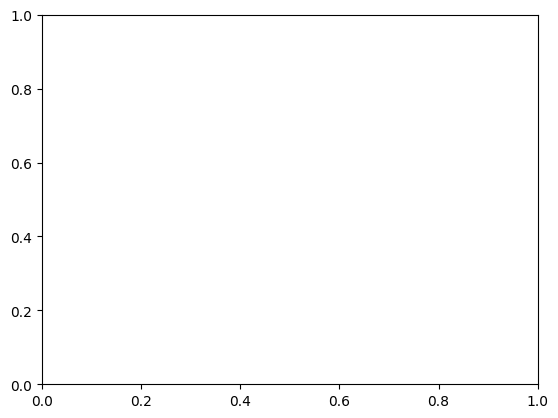

In [42]:
# plot misclassification error vs k
plt.plot(k_neighbors,mse)
plt.xlabel("no of neighbors k")
plt.ylabel("misclassification error")
plt.show()

In [43]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9914665608255606
0.9900459418070444
